##Introduction = Financial Analytics Data

In today's competitive business landscape, understanding market dynamics and competitor performance is crucial for strategic decision-making and sustained growth. This analysis focuses on exploring key financial metrics—market capitalization (Mar Cap) and quarterly sales (Sales Qtr)—of the top 500 companies in India. Market capitalization reflects the total market value of a company's outstanding shares, while quarterly sales provide a snapshot of revenue generation over a specific period.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
import math
%matplotlib inline
warnings.filterwarnings('ignore')
%precision 2

'%.2f'

In [ ]:
df = pd.read_csv("Financial Analytics data.csv")
df.head()
# read the csv

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
0,1,Reliance Inds.,583436.72,99810.00,NaN
1,2,TCS,563709.84,30904.00,NaN
2,3,HDFC Bank,482953.59,20581.27,NaN
3,4,ITC,320985.27,9772.02,NaN
4,5,H D F C,289497.37,16840.51,NaN


In [ ]:
df['Sales Qtr - Crore'] = df['Sales Qtr - Crore'].fillna(method='bfill')
df['Sales Qtr - Crore'].isnull().value_counts()

Sales Qtr - Crore
False    487
True       1
Name: count, dtype: int64

In [ ]:
df['Mar Cap - Crore'] = df['Mar Cap - Crore'].fillna(method='bfill')
df['Mar Cap - Crore'].isnull().value_counts()

Mar Cap - Crore
False    487
True       1
Name: count, dtype: int64

In [ ]:
df.drop('Unnamed: 4',axis = 1,inplace = True)
df.drop('S.No.',axis = 1,inplace = True)
# try to clean the data

In [ ]:
df.head()

,Name,Mar Cap - Crore,Sales Qtr - Crore
0,Reliance Inds.,583436.72,99810.00
1,TCS,563709.84,30904.00
2,HDFC Bank,482953.59,20581.27
3,ITC,320985.27,9772.02
4,H D F C,289497.37,16840.51


In [ ]:
df.info()
# data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               488 non-null    object 
 1   Mar Cap - Crore    487 non-null    float64
 2   Sales Qtr - Crore  487 non-null    float64
dtypes: float64(2), object(1)
memory usage: 11.6+ KB


In [ ]:

#for making csv clean

In [ ]:
df.describe()

,Mar Cap - Crore,Sales Qtr - Crore
count,487.000000,487.000000
mean,27767.896057,4495.193039
std,59020.951477,9972.862315
min,3017.070000,47.240000
25%,4843.575000,667.580000
50%,9569.140000,1397.950000
75%,23516.670000,3495.090000
max,583436.720000,110666.930000


In [ ]:
df.isnull().value_counts()

Name   Mar Cap - Crore  Sales Qtr - Crore
False  False            False                487
       True             True                   1
Name: count, dtype: int64

<Axes: >

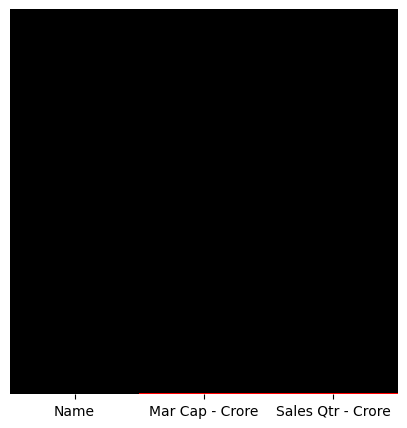

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='flag_r')
#this is use to represent the null value within the data

array([[<Axes: title={'center': 'Mar Cap - Crore'}>,
        <Axes: title={'center': 'Sales Qtr - Crore'}>]], dtype=object)

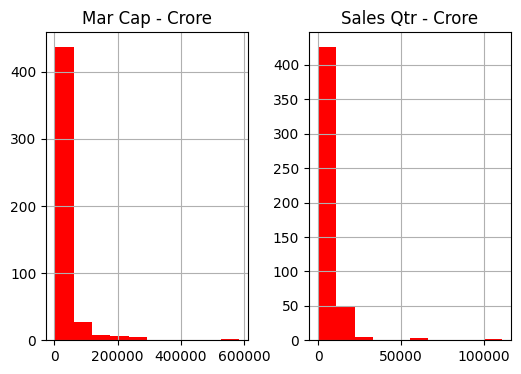

In [ ]:
df.hist(figsize=(6,4),color='red')      #here it is ploting float data graph present in csv file

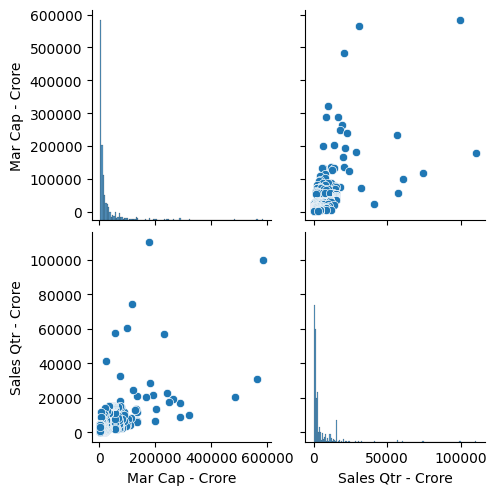

In [ ]:
sns.pairplot(data=df)   #here  data is presented in pair and are compaired with each condition

In [ ]:
# Select numerical columns
numerical_data = df.select_dtypes(include=['float', 'int'])

# Calculate standard deviation
np.std(numerical_data)

Mar Cap - Crore      58960.323879
Sales Qtr - Crore     9962.617975
dtype: float64

In [ ]:
# Calculate standard deviation
np.var(numerical_data)

Mar Cap - Crore      3.476320e+09
Sales Qtr - Crore    9.925376e+07
dtype: float64

In [ ]:
# Calculate correlation
numerical_data.corr()

,Mar Cap - Crore,Sales Qtr - Crore
Mar Cap - Crore,1.00000,0.61607
Sales Qtr - Crore,0.61607,1.00000


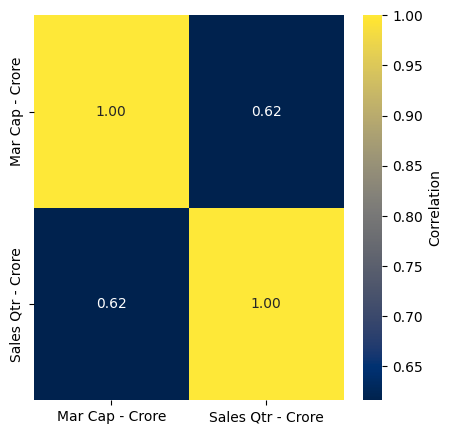

In [ ]:
plt.figure(figsize=(5,5))  # Adjust figure size as needed
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, cmap='cividis', annot=True, fmt=".2f", cbar_kws={'label': 'Correlation'})
plt.show()

#### Mar Cap - Crore,Sales Qtr - Crore

In [ ]:
df['Name'].unique()

array(['Reliance Inds.', 'TCS', 'HDFC Bank', 'ITC', 'H D F C',
       'Hind. Unilever', 'Maruti Suzuki', 'Infosys', 'O N G C',
       'St Bk of India', 'ICICI Bank', 'Kotak Mah. Bank', 'Coal India',
       'Larsen & Toubro', 'I O C L', 'Bharti Airtel', 'Axis Bank', 'NTPC',
       'Sun Pharma.Inds.', 'Hind.Zinc', 'Wipro', 'HCL Technologies',
       'Vedanta', 'Tata Motors', 'UltraTech Cem.', 'Asian Paints',
       'Power Grid Corpn', 'B P C L', 'IndusInd Bank', 'Bajaj Fin.',
       'Bajaj Auto', 'M & M', 'HDFC Stand. Life', 'Adani Ports',
       'Bajaj Finserv', 'GAIL (India)', 'Avenue Super.', 'Titan Company',
       'JSW Steel', 'Grasim Inds', 'Tata Steel', 'Eicher Motors',
       'Nestle India', 'Godrej Consumer', 'Yes Bank', 'Hero Motocorp',
       'Motherson Sumi', 'SBI Life Insuran', 'General Insuranc',
       'Bharti Infra.', 'Dabur India', 'Bosch', 'Shree Cement',
       'New India Assura', 'H P C L', 'ICICI Pru Life', 'Britannia Inds.',
       'Tech Mahindra', 'Hindalco Inds.',

In [ ]:
df['Name'].value_counts().count()

488

In [ ]:
#relation between Market Capitalization  and  Quarterly Sale
df['Ratio - Crore'] = df['Mar Cap - Crore']/df['Sales Qtr - Crore']
df.head()

,Name,Mar Cap - Crore,Sales Qtr - Crore,Ratio - Crore
0,Reliance Inds.,583436.72,99810.00,5.845474
1,TCS,563709.84,30904.00,18.240676
2,HDFC Bank,482953.59,20581.27,23.465685
3,ITC,320985.27,9772.02,32.847382
4,H D F C,289497.37,16840.51,17.190535


In [ ]:
df['Ratio - Crore'].isnull().value_counts()

Ratio - Crore
False    487
True       1
Name: count, dtype: int64

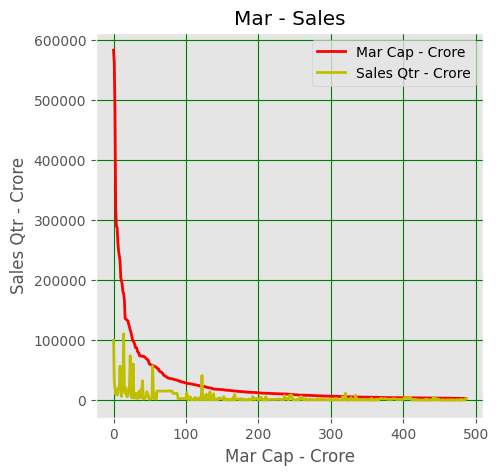

In [ ]:
style.use('ggplot')
plt.figure(figsize=(5,5))
plt.plot(df['Mar Cap - Crore'],'r',label='Mar Cap - Crore',linewidth=2)
plt.plot(df['Sales Qtr - Crore'],'y',label='Sales Qtr - Crore',linewidth=2)
plt.title('Mar - Sales')
plt.xlabel('Mar Cap - Crore')
plt.ylabel('Sales Qtr - Crore')
plt.legend()
plt.grid(True, color='g')
plt.show()

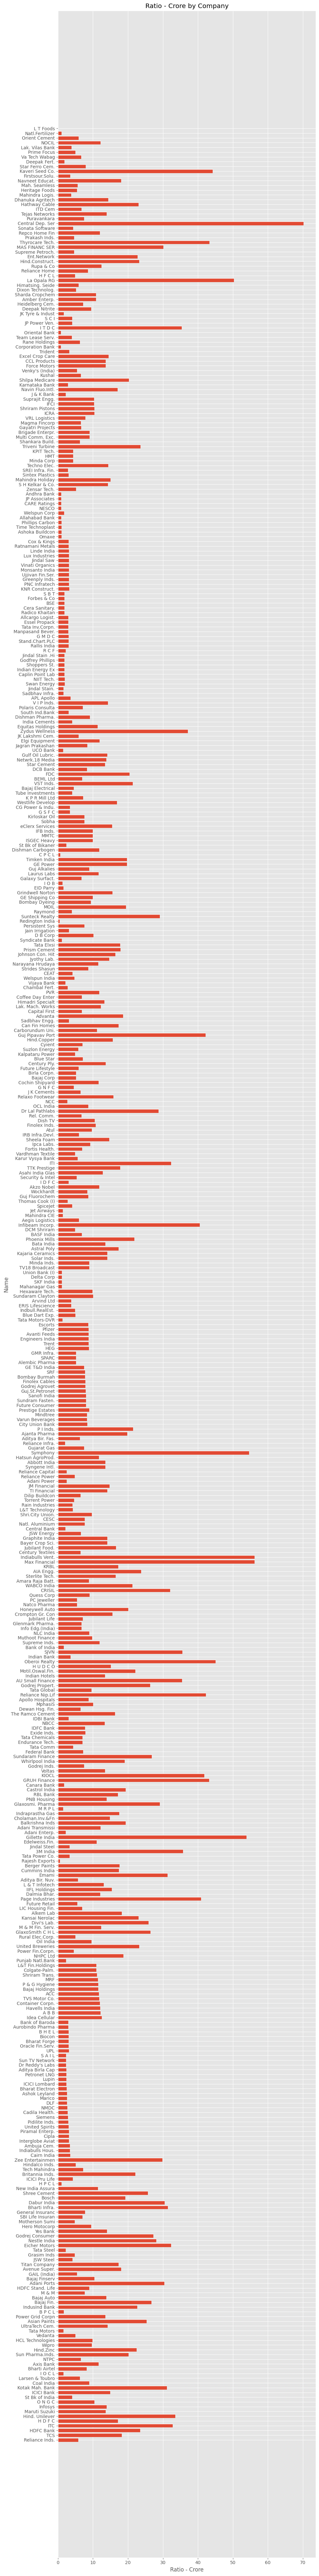

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 80))

# Plotting the horizontal bar chart
bars = plt.barh(df['Name'], df['Ratio - Crore'])

# Adding white lines between bars
for bar in bars:
    x, y = bar.get_xy()
    w, h = bar.get_width(), bar.get_height()
    plt.plot([x, x + w], [y + h, y + h], color='white', linewidth=1)

plt.ylabel('Name')
plt.xlabel('Ratio - Crore')
plt.title('Ratio - Crore by Company')
plt.tight_layout()
plt.show()

## Questions :

1. Which companies are in the top percentile for Market Capitalization, and what are their corresponding Quarterly Sales figures?

 This question helps identify the market leaders in terms of size and revenue generation.

2. Is there a notable correlation between Market Capitalization and Quarterly Sales across the dataset?

 Understanding this correlation can indicate how closely market value aligns with revenue generation.
3. Among different sectors, which sector has the highest average Market Capitalization? How does this compare to their average Quarterly Sales?

 Sector analysis helps in identifying dominant industries and their economic footprint.

4. Are there any outliers where companies have unexpectedly high Market Capitalization relative to their Quarterly Sales or vice versa? What factors might explain these outliers?

 Exploring outliers can uncover unique business models, market niches, or operational efficiencies.

5. What is the average Market Cap to Sales ratio among the top companies? Are there sectors or individual companies that significantly deviate from this average?

 This metric provides insights into financial efficiency and valuation discrepancies.

6. How does the market share of the top 10 companies in terms of Market Capitalization compare to the rest of the top 500 companies?

 Assessing market concentration provides insights into competitive intensity and industry consolidation.

9. How has the market capitalization trended over the past quarters/years?


#### Trend Analysis

In [ ]:
#How has the market capitalization trended over the past quarters/years?

sales_quarter = df['Sales Qtr - Crore']
sales_month = df['Sales Qtr - Crore']/3
Sales_year = sales_month*12

#calculate sales of one month
sales_month =  pd.DataFrame(sales_month)
Sales_year = pd.DataFrame(Sales_year)
sales_quarter = pd.DataFrame(sales_quarter)
sales_month.columns = ['Sales_Month - crore']
Sales_year.columns = ['Sales_Year - crore']
sales_quarter.columns = ['Sales_Quarter - crore']

df1 = sales_month.merge(sales_quarter,left_index=True,right_index=True).merge(Sales_year,left_index=True,right_index=True)
df1.head()

,Sales_Month - crore,Sales_Quarter - crore,Sales_Year - crore
0,33270.000000,99810.00,399240.00
1,10301.333333,30904.00,123616.00
2,6860.423333,20581.27,82325.08
3,3257.340000,9772.02,39088.08
4,5613.503333,16840.51,67362.04


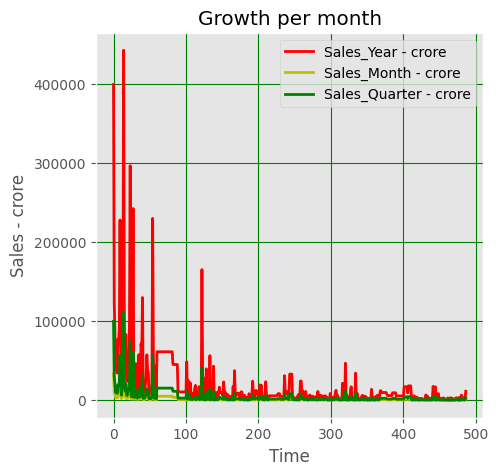

In [ ]:
style.use('ggplot')
plt.figure(figsize=(5,5))
plt.plot(Sales_year['Sales_Year - crore'],'r',label='Sales_Year - crore',linewidth=2)
plt.plot(sales_month['Sales_Month - crore'],'y',label='Sales_Month - crore',linewidth=2)
plt.plot(sales_quarter['Sales_Quarter - crore'],'g',label='Sales_Quarter - crore',linewidth=2)
plt.title('Growth per month')
plt.xlabel('Time')
plt.ylabel('Sales - crore')
plt.legend()
plt.grid(True, color='g')
plt.show()

In [ ]:
#Which companies are in the top percentile for Market Capitalization, and what are their corresponding Quarterly Sales figures?

df.sort_values(by='Mar Cap - Crore',ascending=False).head(10)

,Name,Mar Cap - Crore,Sales Qtr - Crore,Ratio - Crore
0,Reliance Inds.,583436.72,99810.00,5.845474
1,TCS,563709.84,30904.00,18.240676
2,HDFC Bank,482953.59,20581.27,23.465685
3,ITC,320985.27,9772.02,32.847382
4,H D F C,289497.37,16840.51,17.190535
5,Hind. Unilever,288265.26,8590.00,33.558237
6,Maruti Suzuki,263493.81,19283.20,13.664423
7,Infosys,248320.35,17794.00,13.955285
8,O N G C,239981.50,22995.88,10.435848
9,St Bk of India,232763.33,57014.08,4.082559


In [ ]:
threshold = df['Mar Cap - Crore'].quantile(0.99)
top_companies = df[df['Mar Cap - Crore'] >= threshold][['Name', 'Sales Qtr - Crore']]
display(top_companies)

,Name,Sales Qtr - Crore
0,Reliance Inds.,99810.00
1,TCS,30904.00
2,HDFC Bank,20581.27
3,ITC,9772.02
4,H D F C,16840.51


In [ ]:
#Is there a notable correlation between Market Capitalization and Quarterly Sales across the dataset?

correlation = df['Mar Cap - Crore'].corr(df['Sales Qtr - Crore'])
print(f"The correlation between Market Capitalization and Quarterly Sales is: {correlation:.2f}")

The correlation between Market Capitalization and Quarterly Sales is: 0.62


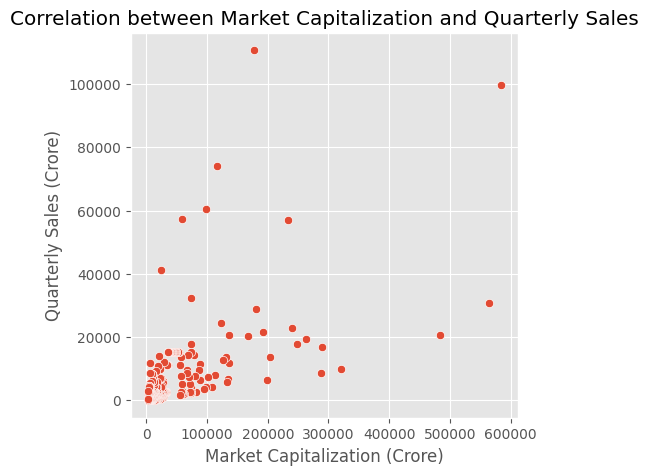

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='Mar Cap - Crore', y='Sales Qtr - Crore', data=df)
plt.title('Correlation between Market Capitalization and Quarterly Sales')
plt.xlabel('Market Capitalization (Crore)')
plt.ylabel('Quarterly Sales (Crore)')
plt.grid(True)
plt.show()

In [ ]:
#Among different sectors, which sector has the highest average Market Capitalization? How does this compare to their average Quarterly Sales?

sector_analysis = df.groupby('Name')[['Mar Cap - Crore', 'Sales Qtr - Crore']].mean()
highest_market_cap_sector = sector_analysis['Mar Cap - Crore'].idxmax()
print(f"The sector with the highest average Market Capitalization is: {highest_market_cap_sector}")

sector_analysis.loc[highest_market_cap_sector]

The sector with the highest average Market Capitalization is: Reliance Inds.


Mar Cap - Crore      583436.72
Sales Qtr - Crore     99810.00
Name: Reliance Inds., dtype: float64

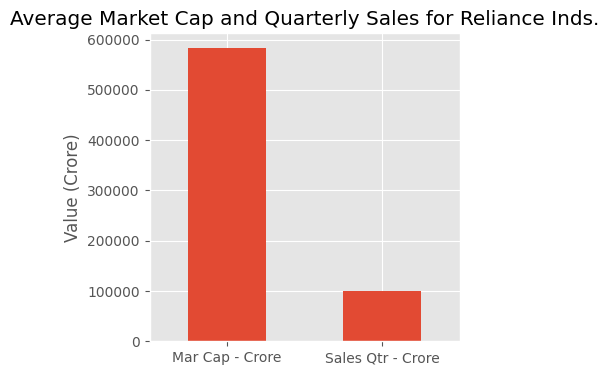

In [ ]:
sector_analysis.loc[highest_market_cap_sector].plot(kind='bar', figsize=(4,4))
plt.title(f"Average Market Cap and Quarterly Sales for {highest_market_cap_sector}")
plt.ylabel("Value (Crore)")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

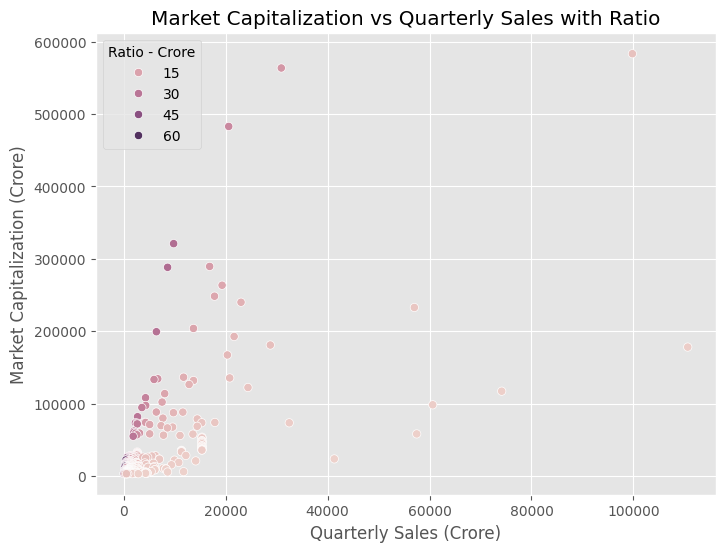

In [ ]:
#Are there any outliers where companies have unexpectedly high Market Capitalization relative to their Quarterly Sales or vice versa? What factors might explain these outliers?

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sales Qtr - Crore', y='Mar Cap - Crore', hue='Ratio - Crore', data=df)
plt.title('Market Capitalization vs Quarterly Sales with Ratio')
plt.xlabel('Quarterly Sales (Crore)')
plt.ylabel('Market Capitalization (Crore)')
plt.grid(True)
plt.show()

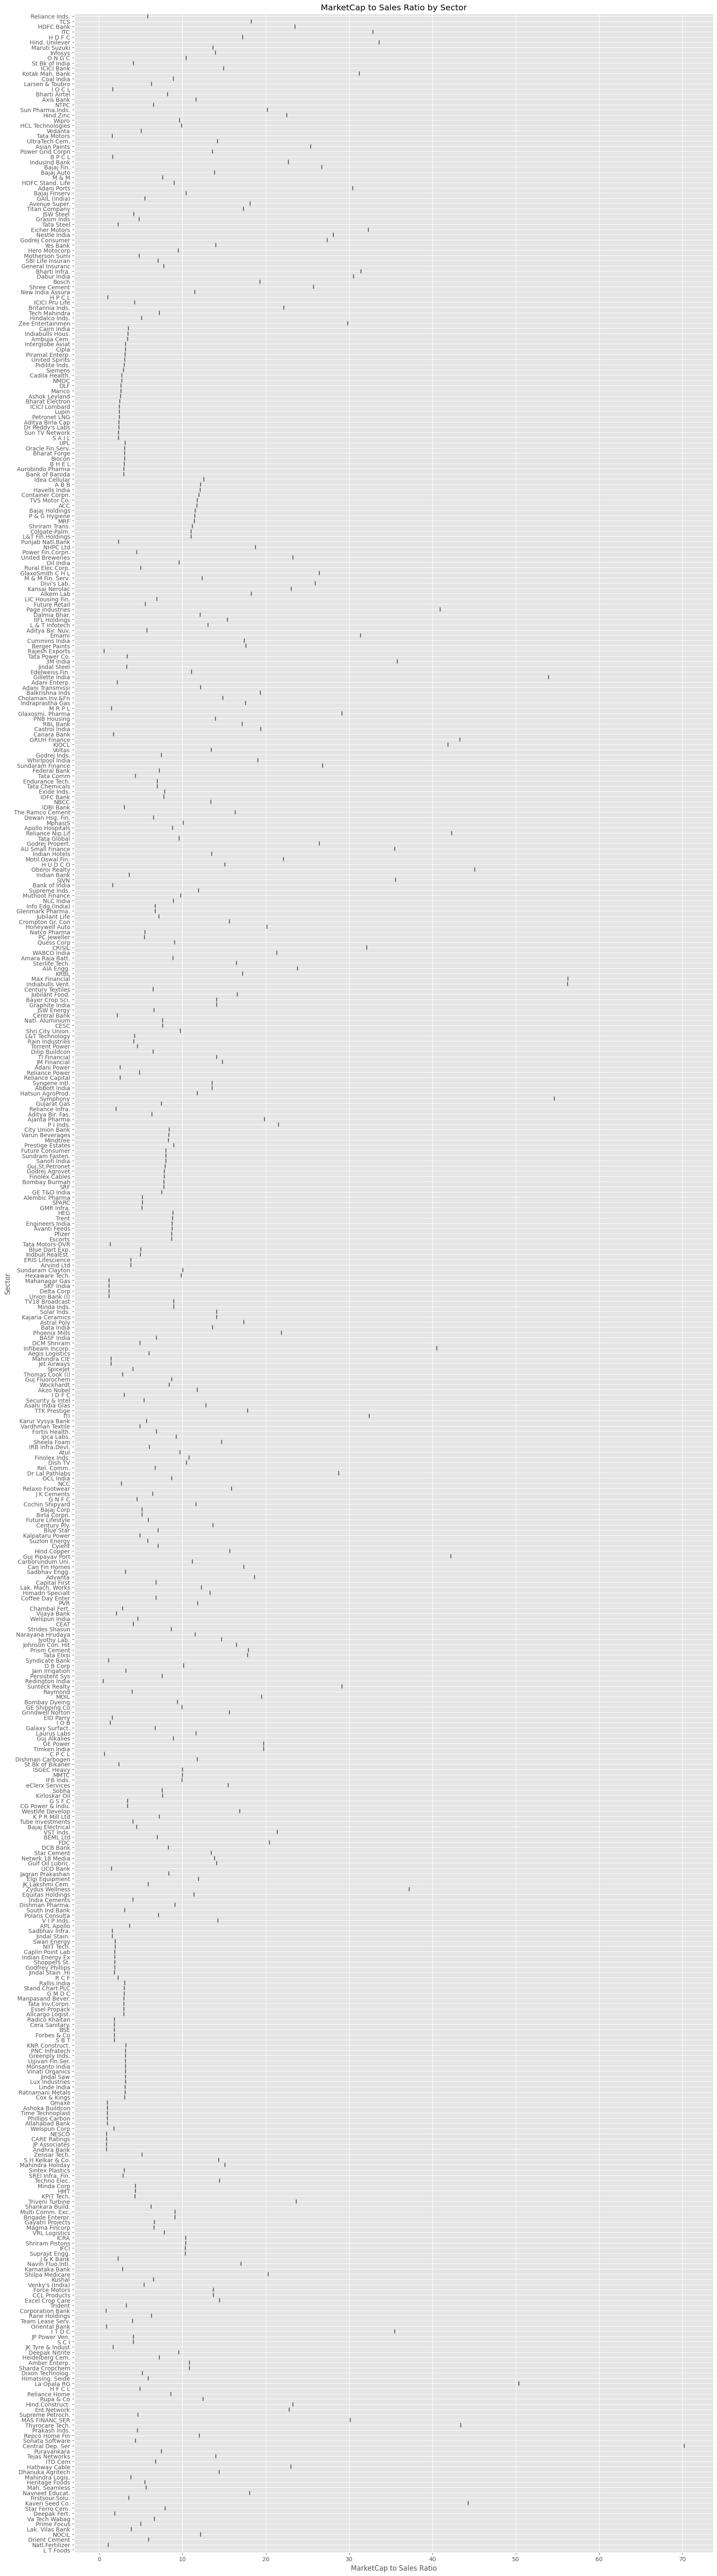

In [ ]:
plt.figure(figsize=(20, 80))
sns.boxplot(y='Name', x='Ratio - Crore', data=df)
plt.title('MarketCap to Sales Ratio by Sector')
plt.ylabel('Sector')
plt.xlabel('MarketCap to Sales Ratio')
plt.grid(True)
plt.show()

In [ ]:
#What is the average Market Cap to Sales ratio among the top companies? Are there sectors or individual companies that significantly deviate from this average?

threshold = df['Mar Cap - Crore'].quantile(0.99)
top_companies = df[df['Mar Cap - Crore'] >= threshold]
n = 10  # Replace with the desired number of top companies
top_companies = df.nlargest(n, 'Mar Cap - Crore')
average_ratio = top_companies['Ratio - Crore'].mean()
print(f"Average Market Cap to Sales ratio among top companies: {average_ratio:.2f}")
sector_deviations = top_companies.groupby('Name')['Ratio - Crore'].mean().sort_values(ascending=False)
print(sector_deviations)

Average Market Cap to Sales ratio among top companies: 17.33
Name
Hind. Unilever    33.558237
ITC               32.847382
HDFC Bank         23.465685
TCS               18.240676
H D F C           17.190535
Infosys           13.955285
Maruti Suzuki     13.664423
O N G C           10.435848
Reliance Inds.     5.845474
St Bk of India     4.082559
Name: Ratio - Crore, dtype: float64


Market share of top 10 companies: 25.98%
Market share of the rest of the top 500 companies: 74.02%


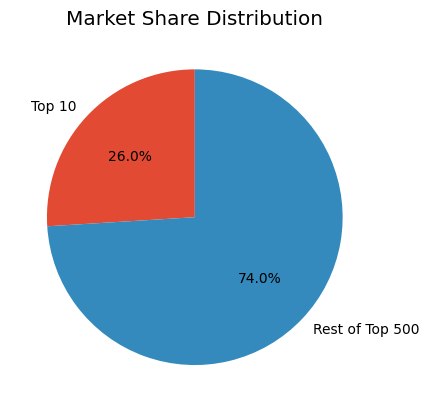

In [ ]:
#How does the market share of the top 10 companies in terms of Market Capitalization compare to the rest of the top 500 companies?

top_10 = df.nlargest(10, 'Mar Cap - Crore')
top_500 = df.nlargest(500, 'Mar Cap - Crore')  # Assuming you have data for top 500
top_10_market_share = top_10['Mar Cap - Crore'].sum() / top_500['Mar Cap - Crore'].sum()
rest_market_share = 1 - top_10_market_share

print(f"Market share of top 10 companies: {top_10_market_share:.2%}")
print(f"Market share of the rest of the top 500 companies: {rest_market_share:.2%}")

labels = ['Top 10', 'Rest of Top 500']
sizes = [top_10_market_share, rest_market_share]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Market Share Distribution')
plt.show()

In [ ]:
df.columns

Index(['Name', 'Mar Cap - Crore', 'Sales Qtr - Crore', 'Ratio - Crore'], dtype='object')

##Summary

This analysis explores the relationship between market capitalization (Mar Cap) and quarterly sales (Sales Qtr) of India's top 500 companies. Key findings reveal a strong positive correlation between higher sales and increased market capitalization, highlighting the influence of revenue generation on market valuation. The analysis, supported by descriptive statistics and visualizations, provides actionable insights for strategic decision-making, emphasizing the importance of understanding financial metrics to navigate competitive landscapes effectively and drive sustainable growth.